## Домашнее задание №1

Выполнила Головина Мария, БЭК145

In [1]:
import pandas as pd
import numpy as np
import scipy as scp

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
nameslist = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
             "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
             "hours-per-week", "native-country", "50K"]

data = pd.read_csv('adult.data.csv', header = None, names = nameslist, skipinitialspace = True)
data.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


### Вопрос 1
Сколько мужчин и женщин в выборке?

In [3]:
print('Мужчин в выборке %i, а женщин – %i.' % (data['sex'][data['sex']=='Male'].count(), data['sex'][data['sex']=='Female'].count()))

Мужчин в выборке 21790, а женщин – 10771.


### Вопрос 2
Каков средний возраст мужчин?


In [9]:
data.groupby('sex')['age'].mean()['Male']

39.433547498852683

### Вопрос 3
Какова доля граждан США?

написать про ?

In [11]:
data['native-country'].value_counts(normalize = True).head(1)

United-States    0.895857
Name: native-country, dtype: float64

In [9]:
data['age'][data['native-country']=='United-States'].count()/data.shape[0]

0.89585700684868397

### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

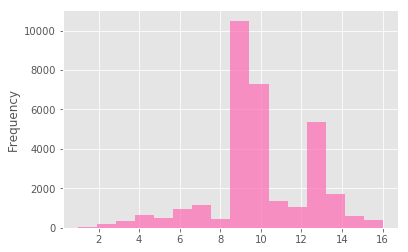

In [10]:
data['education-num'].plot.hist(bins = len(set(data['education-num'])), color = 'hotpink', alpha = 0.7);

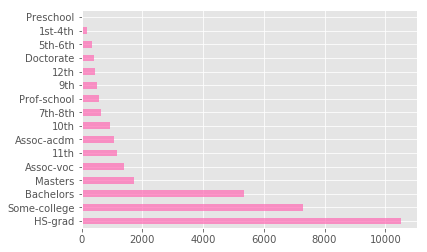

In [13]:
data['education'].value_counts().plot(kind = 'barh', color = 'hotpink', alpha = 0.7);

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [14]:
print('Среднее:', data['fnlwgt'][data['marital-status'] == 'Divorced'].mean())

Среднее: 185802.79045689848


In [18]:
print('Стандартное отклонение:', data['fnlwgt'][data['marital-status'] == 'Divorced'].std())

Стандартное отклонение: 105646.78945933603


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

Будем считать, что Assoc-voc, Assoc-acdm и prof-school не являются высшим образованием, то есть высшее образование имеют только категории людей с education-num 13, 14, 16 (бакалавры, магистры и д.н. соответственно)

In [20]:
data[data['50K'] == '>50K']['education'].value_counts()

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

In [81]:
fiftyk = data[data['50K'] == '>50K']
print('Высшее образование есть у %i человек, это %f от всех.' % (fiftyk[fiftyk['education-num'].isin([13, 14, 16])]['education'].count(), fiftyk[fiftyk['education-num'].isin([13, 14, 16])]['education'].count()/fiftyk['education'].count()))

Высшее образование есть у 3486 человек, это 0.444586 от всех.


То есть если считать, что "в основном" = "в абсолютном большинстве случаев", то утверждение в вопросе 6 неверно.

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [22]:
for i in set(data['race'].values):
    print('Race:', i)
    print('Max age amongst males:', max(data[(data['race'] == i) & (data['sex'] == 'Male')]['age']))
    print('Max age amongst females:', max(data[(data['race'] == i) & (data['sex'] == 'Female')]['age']), '\n')

Race: White
Max age amongst males: 90
Max age amongst females: 90 

Race: Asian-Pac-Islander
Max age amongst males: 90
Max age amongst females: 75 

Race: Other
Max age amongst males: 77
Max age amongst females: 74 

Race: Black
Max age amongst males: 90
Max age amongst females: 90 

Race: Amer-Indian-Eskimo
Max age amongst males: 82
Max age amongst females: 80 



а, точно, есть же групбай

In [25]:
data.groupby(['race','sex'])['age'].max()

race                sex   
Amer-Indian-Eskimo  Female    80
                    Male      82
Asian-Pac-Islander  Female    75
                    Male      90
Black               Female    90
                    Male      90
Other               Female    74
                    Male      77
White               Female    90
                    Male      90
Name: age, dtype: int64

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

В абсолютном значении лидируют США и Мексика, а про ситуацию в целом по стране (где больше всего доля фермеров и рыбаков) мы ничего сказать не можем, потому что не знаем ничего про формирование выборки

In [23]:
data[data['occupation'] == 'Farming-fishing']['native-country'].value_counts()

United-States    879
Mexico            77
?                  5
Puerto-Rico        5
Guatemala          4
Philippines        4
Italy              2
Canada             2
El-Salvador        2
Cuba               2
Vietnam            2
Portugal           1
Poland             1
France             1
Yugoslavia         1
Germany            1
Ireland            1
England            1
Cambodia           1
Hong               1
Japan              1
Name: native-country, dtype: int64

Наблюдаемые доли фермеров/рыбаков среди всех рождённых в той или иной стране (просто так):

In [40]:
countries = np.unique(data['native-country'].values)

for i in countries:
    print('Country:', i)
    print('Share:', data[(data['native-country'] == i) & (data['occupation'] == 'Farming-fishing')].count()[0]/data[data['native-country'] == i].count()[0], '\n')

Country: ?
Share: 0.00857632933105 

Country: Cambodia
Share: 0.0526315789474 

Country: Canada
Share: 0.0165289256198 

Country: China
Share: 0.0 

Country: Columbia
Share: 0.0 

Country: Cuba
Share: 0.0210526315789 

Country: Dominican-Republic
Share: 0.0 

Country: Ecuador
Share: 0.0 

Country: El-Salvador
Share: 0.0188679245283 

Country: England
Share: 0.0111111111111 

Country: France
Share: 0.0344827586207 

Country: Germany
Share: 0.00729927007299 

Country: Greece
Share: 0.0 

Country: Guatemala
Share: 0.0625 

Country: Haiti
Share: 0.0 

Country: Holand-Netherlands
Share: 0.0 

Country: Honduras
Share: 0.0 

Country: Hong
Share: 0.05 

Country: Hungary
Share: 0.0 

Country: India
Share: 0.0 

Country: Iran
Share: 0.0 

Country: Ireland
Share: 0.0416666666667 

Country: Italy
Share: 0.027397260274 

Country: Jamaica
Share: 0.0 

Country: Japan
Share: 0.0161290322581 

Country: Laos
Share: 0.0 

Country: Mexico
Share: 0.119751166407 

Country: Nicaragua
Share: 0.0 

Country: Ou

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [41]:
data[(data['education'] == 'Bachelors') & (data['sex'] == 'Male')].count()[0]/data[(data['education'] == 'Masters') & (data['sex'] == 'Male')].count()[0]

3.1474304970513902

In [42]:
data[(data['education'] == 'Bachelors') & (data['sex'] == 'Female')].count()[0]/data[(data['education'] == 'Masters') & (data['sex'] == 'Female')].count()[0]

3.0205223880597014

Первое отношение больше, если смотреть только отношение бакалавров к магистрам

### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [43]:
print('Максимально работают %i часов в неделю, таких людей %i.' % (max(data['hours-per-week']), data[data['hours-per-week'] == max(data['hours-per-week'])].count()[0]))

Максимально работают 99 часов в неделю, таких людей 85.


In [71]:
data[data['hours-per-week'] == max(data['hours-per-week'])]['50K'].value_counts()

<=50K    60
>50K     25
Name: 50K, dtype: int64

Большая часть из них зарабатывает при этом <=50K.